# AutoEncoder Test

In [184]:
import os
import skimage.io as io
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import skimage
from matplotlib import pyplot as plt

In [154]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [155]:
folder_path = "tif_pairs_actual"
num_samples = 200

In [169]:
x = np.ndarray((200, 128, 128))
y = np.ndarray((200, 128, 128))
for i in range(num_samples):
    x[i] = io.imread("{}/f_fbp/{}.tif".format(folder_path, i))
    y[i] = io.imread("{}/f_true/{}.tif".format(folder_path, i))
x = x.astype('float32') / 255.
y = y.astype('float32') / 255.
x = np.reshape(x, (len(x), 128, 128, 1))  # adapt this if using `channels_first` image data format
y = np.reshape(y, (len(y), 128, 128, 1))  # adapt this if using `channels_first` image data format

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [171]:
y_train.shape

(160, 128, 128, 1)

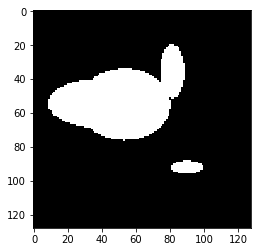

In [173]:
plt.imshow(y_train[0][...,0])

In [161]:
x_test_noisy.shape

(40, 128, 128, 1)

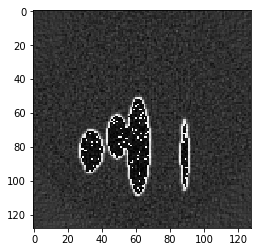

In [174]:
plt.imshow(x_test_noisy[0].reshape(128, 128))

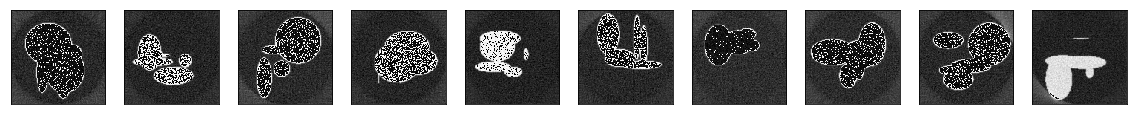

In [175]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [176]:
input_img = Input(shape=(128, 128, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [177]:
autoencoder.fit(x_train, y_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, y_test),
#                 callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)]
               )

Train on 160 samples, validate on 40 samples
Epoch 1/100
160/160 [==============================] - 9s 55ms/step - loss: 0.6921 - val_loss: 0.6761
Epoch 2/100
160/160 [==============================] - 8s 49ms/step - loss: 0.6733 - val_loss: 0.6422
Epoch 3/100
160/160 [==============================] - 8s 49ms/step - loss: 0.6365 - val_loss: 0.5938
Epoch 4/100
160/160 [==============================] - 8s 48ms/step - loss: 0.5937 - val_loss: 0.5079
Epoch 5/100
160/160 [==============================] - 8s 49ms/step - loss: 0.5013 - val_loss: 0.5483
Epoch 6/100
160/160 [==============================] - 8s 48ms/step - loss: 0.5697 - val_loss: 0.4287
Epoch 7/100
160/160 [==============================] - 8s 48ms/step - loss: 0.4085 - val_loss: 0.2626
Epoch 8/100
160/160 [==============================] - 8s 49ms/step - loss: 0.2521 - val_loss: 0.2589
Epoch 9/100
160/160 [==============================] - 8s 49ms/step - loss: 0.3228 - val_loss: 1.0249
Epoch 10/100
160/160 [===============

In [178]:
decoded_imgs = autoencoder.predict(x_test)

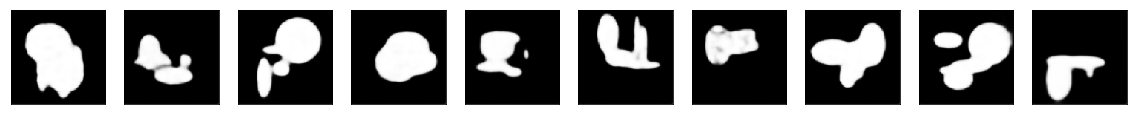

In [179]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

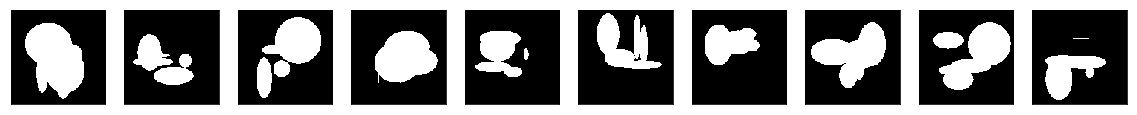

In [181]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(y_test[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [215]:
psnr = []
ssim = []
wang = []
for i in range(len(x_test)):
    psnr.append(skimage.measure.compare_psnr(y_test[i], decoded_imgs[i]))
    ssim.append(skimage.measure.compare_ssim(y_test[i].reshape(128, 128), decoded_imgs[i].reshape(128, 128)))
    wang.append(skimage.measure.compare_ssim(
        y_test[i].reshape(128, 128), 
        decoded_imgs[i].reshape(128, 128),
        gaussian_weights=True,
        sigma=1.5,
        use_sample_covariance=False
    ))
print(np.mean(psnr))
print(np.mean(ssim))
print(np.mean(wang))

19.9061341655
0.922256717056
0.916583216608
